In [5]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import json, glob
from intrinio_api import *
%matplotlib inline

In [2]:
available_files = !ls -ltS financials/requests | awk '{if($5 > 1000) print $9}'
available_tickers = np.unique([re.match('([A-Z]+)_.*', f).group(1) for f in available_files])

In [3]:
len(available_tickers)

526

In [4]:
tickers_df = pd.read_csv('tickers.csv')

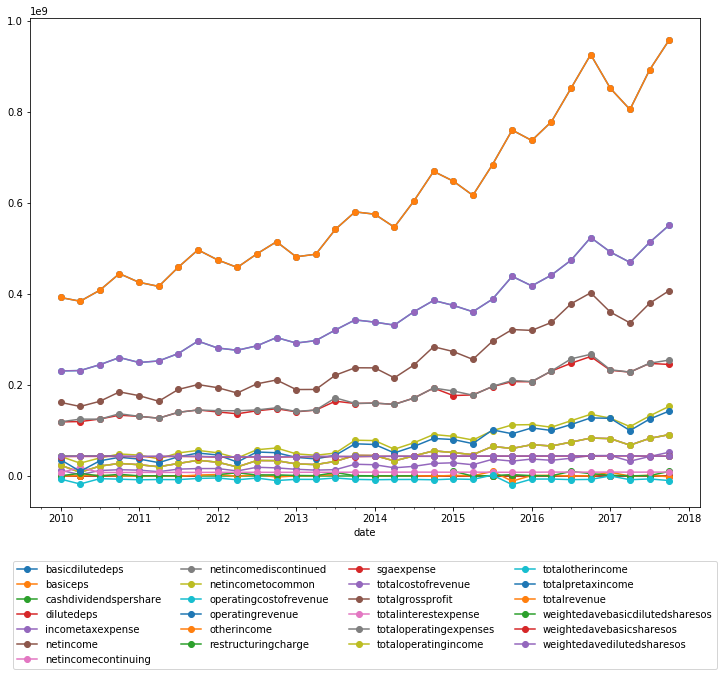

In [8]:
ticker = 'AYI'
fig,ax = plt.subplots(figsize=(12,9))
df_t = get_df(ticker)
df_t.query("statement=='income_statement'").pivot_table('value','date','tag').plot(ax=ax, marker='o')
ax.legend(loc=9, bbox_to_anchor=(.5,-.1), ncol=4)

In [10]:
df_t.query("statement=='income_statement'").pivot_table('value','date','tag')

tag,basicdilutedeps,basiceps,cashdividendspershare,dilutedeps,incometaxexpense,netincome,netincomecontinuing,netincomediscontinued,netincometocommon,operatingcostofrevenue,...,totalgrossprofit,totalinterestexpense,totaloperatingexpenses,totaloperatingincome,totalotherincome,totalpretaxincome,totalrevenue,weightedavebasicdilutedsharesos,weightedavebasicsharesos,weightedavedilutedsharesos
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.54,0.54,0.13,0.53,12200000.0,23300000.0,23300000.0,NaN,23300000.0,230400000.0,...,161300000.0,6700000.0,118600000.0,42700000.0,-7200000.0,35500000.0,391700000.0,43100000.0,42300000.0,43100000.0
2010-04-01,0.18,0.18,0.13,0.17,2600000.0,7800000.0,7200000.0,600000.0,7800000.0,231200000.0,...,152300000.0,18600000.0,124500000.0,27800000.0,-18000000.0,9800000.0,383500000.0,43300000.0,42500000.0,43300000.0
2010-07-01,0.49,0.49,0.13,0.48,11600000.0,21300000.0,21300000.0,NaN,21300000.0,244000000.0,...,163600000.0,7300000.0,124400000.0,39200000.0,-6300000.0,32900000.0,407600000.0,43500000.0,42700000.0,43500000.0
2010-10-01,0.63,0.63,0.13,0.62,13400000.0,27200000.0,27200000.0,NaN,27200000.0,259800000.0,...,184300000.0,7300000.0,136300000.0,48000000.0,-7400000.0,40600000.0,444100000.0,43300000.0,42500000.0,43300000.0
2011-01-01,NaN,NaN,0.13,NaN,12400000.0,24400000.0,24400000.0,NaN,24400000.0,248900000.0,...,176100000.0,7500000.0,130600000.0,45500000.0,-8700000.0,36800000.0,425000000.0,NaN,42000000.0,42800000.0
2011-04-01,NaN,0.46,0.13,0.45,9100000.0,19900000.0,19900000.0,NaN,19900000.0,252300000.0,...,163800000.0,7500000.0,126600000.0,37200000.0,-8200000.0,29000000.0,416100000.0,NaN,42300000.0,43000000.0
2011-07-01,NaN,0.63,0.13,0.62,14700000.0,27100000.0,27100000.0,NaN,27100000.0,268600000.0,...,189700000.0,7500000.0,139500000.0,50200000.0,-8400000.0,41800000.0,458300000.0,NaN,42500000.0,43100000.0
2011-10-01,2.46,1.37,0.13,1.35,15900000.0,34100000.0,34100000.0,NaN,34100000.0,295900000.0,...,200400000.0,7400000.0,144600000.0,55800000.0,-5800000.0,50000000.0,496300000.0,42900000.0,42200000.0,42800000.0
2012-01-01,NaN,NaN,0.13,NaN,15900000.0,29900000.0,29900000.0,NaN,29900000.0,280700000.0,...,193600000.0,7700000.0,143000000.0,50600000.0,-4800000.0,45800000.0,474300000.0,NaN,41200000.0,41700000.0
